In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
df = pd.read_csv('urldataset.csv')
df.head(5)

,Domain,Having_IP,Having_At,URL_Length,URL_Depth,Redirect,Https_Domain,TinyURL,Prefix/Suffix,Label
0,censor.net.ua,0,0,1,3,0,0,0,0,0
1,sberbank.ru,0,0,1,6,0,0,0,0,0
2,sourceforge.net,0,0,1,2,0,0,0,0,0
3,olx.co.id,0,0,1,2,0,0,1,0,0
4,buzzfil.net,0,0,1,4,0,0,0,0,0


In [3]:
df.tail()

,Domain,Having_IP,Having_At,URL_Length,URL_Depth,Redirect,Https_Domain,TinyURL,Prefix/Suffix,Label
39995,shipping383.weebly.com,0,0,0,0,0,0,0,0,1
39996,msigniinconbsepro.gitbook.io,0,0,0,1,0,0,0,0,1
39997,mlydqgkftpeda.web.app,0,0,0,0,0,0,0,0,1
39998,bgrectbzzz.firebaseapp.com,0,0,0,0,0,0,0,0,1
39999,rb.gy,0,0,0,1,0,0,0,0,1


In [4]:
df.shape

(40000, 10)

In [5]:
df.columns

Index(['Domain', 'Having_IP', 'Having_At', 'URL_Length', 'URL_Depth',
       'Redirect', 'Https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label'],
      dtype='object')

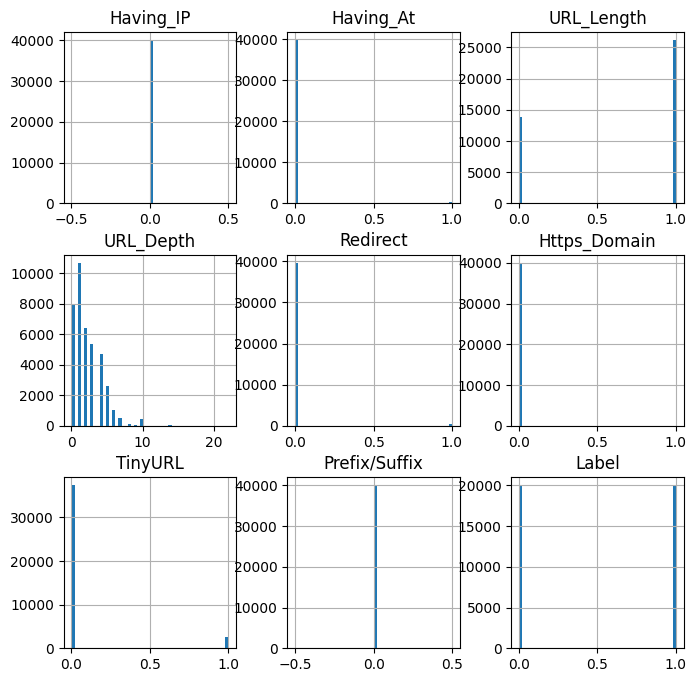

In [6]:
df.hist(bins= 50, figsize=(8,8))
plt.show()

In [7]:
df = df.drop(['Domain'], axis = 1).copy()

In [8]:
df.describe()

,Having_IP,Having_At,URL_Length,URL_Depth,Redirect,Https_Domain,TinyURL,Prefix/Suffix,Label
count,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000
mean,0.0,0.007250,0.652725,2.213275,0.009625,0.000025,0.066225,0.0,0.500000
std,0.0,0.084839,0.476110,2.040060,0.097635,0.005000,0.248678,0.0,0.500006
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.500000
75%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,0.0,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [9]:
df.isnull().sum()

Having_IP        0
Having_At        0
URL_Length       0
URL_Depth        0
Redirect         0
Https_Domain     0
TinyURL          0
Prefix/Suffix    0
Label            0
dtype: int64

Now in dataset first 20000 is legit data and other 20000 is phishing data,so let's shuffle them so that when spliting for train and test it's equally distributed

In [10]:
#Shuffling Dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,Having_IP,Having_At,URL_Length,URL_Depth,Redirect,Https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,1,3,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1
2,0,0,1,7,0,0,0,0,0
3,0,0,1,6,0,0,0,0,0
4,0,0,1,2,0,0,0,0,0


In [11]:
#asssiging features and target column
y = df['Label']
x = df.drop('Label',axis=1)
x.shape,y.shape

((40000, 8), (40000,))

In [12]:
#spliting the data into train/test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32000, 8), (8000, 8), (32000,), (8000,))

In [13]:
#making 3 lists to store model names and their accuracy scores
Models = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  Models.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [14]:
#logistic regression model 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [15]:
#lets see the prediction
y_test_logi = logistic.predict(x_test)
y_train_logi = logistic.predict(x_train)
print("test logi:",y_test_logi)
print("train logi:",y_train_logi)

test logi: [1 0 0 ... 0 0 1]
train logi: [0 0 1 ... 1 1 1]


In [16]:
#let's see the accuracy score
acc_train_logi = accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)
print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logi))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logi))

Logistic Regression: Accuracy on training Data: 0.848
Logistic Regression: Accuracy on test Data: 0.849


In [17]:
#storing the result in the list to compare them afterwards
storeResults('Logistic Regression', acc_train_logi, acc_test_logi)
print(Models,acc_test,acc_train)

['Logistic Regression'] [0.849] [0.848]


In [18]:
#let's add another algorithm decision tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(max_depth=5)
decision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
#let's see the prediction
y_test_tree = decision.predict(x_test)
y_train_tree = decision.predict(x_train)
print("test Decision Tree:",y_test_tree)
print("train Decision Tree:",y_train_tree)

test Decision Tree: [1 0 0 ... 0 0 1]
train Decision Tree: [0 0 1 ... 1 1 1]


In [20]:
#let's see the accuracy of this model
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training data: 0.869
Decision Tree : Accuracy on test data: 0.868


In [21]:
#storing result
storeResults('Decision Tree', acc_train_tree, acc_test_tree)
print(Models,acc_test,acc_train)

['Logistic Regression', 'Decision Tree'] [0.849, 0.868] [0.848, 0.869]


In [22]:
#adding another algorithm Random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [23]:
#let's see the prediction
y_train_forest = forest.predict(x_train)
y_test_forest = forest.predict(x_test)
print("Train Random Forest :",y_train_forest)
print("Test Random Forest:",y_test_forest)

Train Random Forest : [0 1 1 ... 1 1 1]
Test Random Forest: [1 0 0 ... 0 0 1]


In [24]:
#let's see this model accuracy score
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest= accuracy_score(y_test,y_test_forest)
print("Random forest: Accuracy score in training data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy score in testing data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy score in training data: 0.859
Random forest: Accuracy score in testing data: 0.863


In [25]:
#storing the accuracy result
storeResults('Random Forest', acc_train_forest,acc_test_forest)
print(Models,acc_train,acc_test)

['Logistic Regression', 'Decision Tree', 'Random Forest'] [0.848, 0.869, 0.859] [0.849, 0.868, 0.863]


In [26]:
#creating a dataframe to see the model's and their accuracy comparision
compare = pd.DataFrame({'Ml Model': Models,'Train Accuracy':acc_train,'Test Accuracy':acc_test})
compare.head()

,Ml Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.848,0.849
1,Decision Tree,0.869,0.868
2,Random Forest,0.859,0.863


In [27]:
#Sorting the datafram on accuracy
compare.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Ml Model,Train Accuracy,Test Accuracy
1,Decision Tree,0.869,0.868
2,Random Forest,0.859,0.863
0,Logistic Regression,0.848,0.849


As you can see from the above comparision that decision tree works best wtith this dataset 

In [28]:
#saving Decision tree model in a pickle file
import pickle
pickle.dump(decision,open('Cyber_model.pkl','wb'))

In [29]:
x_train.shape

(32000, 8)